In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']= 10,6

In [127]:
path =r'C:\Users\GAURI TOSHNIWAL\Documents\DARPG Hackathon\taxes.csv'
df = pd.read_csv(path)

In [128]:
df.drop('Disposals',axis=1,inplace=True)

In [129]:
df.head()

,Year,Month,Recetpts
0,2016,1,474
1,2016,2,687
2,2016,3,1107
3,2016,4,904
4,2016,5,990


In [130]:
df.dtypes

Year        int64
Month       int64
Recetpts    int64
dtype: object

In [131]:
df['Date']= pd.to_datetime(df['Year'].astype(str) + "-" + df['Month'].astype(str),format='%Y-%d')

In [132]:
df.head()

,Year,Month,Recetpts,Date
0,2016,1,474,2016-01-01
1,2016,2,687,2016-01-02
2,2016,3,1107,2016-01-03
3,2016,4,904,2016-01-04
4,2016,5,990,2016-01-05


In [133]:
df.dtypes

Year                 int64
Month                int64
Recetpts             int64
Date        datetime64[ns]
dtype: object

In [134]:
df.drop('Year',axis=1,inplace=True)

In [135]:
df.drop('Month',axis=1,inplace=True)

In [136]:
df.head()

,Recetpts,Date
0,474,2016-01-01
1,687,2016-01-02
2,1107,2016-01-03
3,904,2016-01-04
4,990,2016-01-05


In [137]:
df.dtypes

Recetpts             int64
Date        datetime64[ns]
dtype: object

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
Recetpts    47 non-null int64
Date        47 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 832.0 bytes


In [139]:
df.set_index('Date',inplace=True)

In [140]:
from datetime import datetime
df.head()

,Recetpts
Date,
2016-01-01,474
2016-01-02,687
2016-01-03,1107
2016-01-04,904
2016-01-05,990


In [141]:
df.dtypes

Recetpts    int64
dtype: object

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2016-01-01 to 2019-01-11
Data columns (total 1 columns):
Recetpts    47 non-null int64
dtypes: int64(1)
memory usage: 752.0 bytes


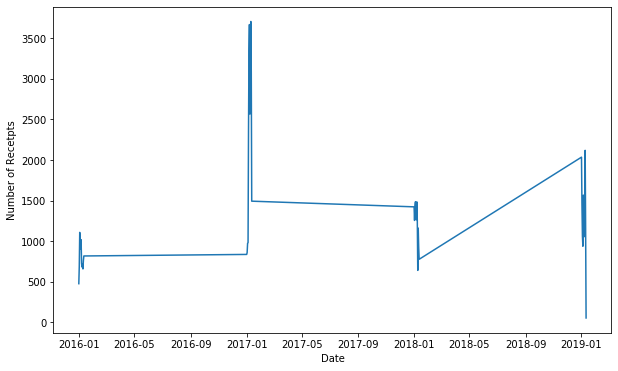

In [143]:
plt.xlabel('Date')
plt.ylabel("Number of Recetpts")
plt.plot(df)

In [144]:
#perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller
print('results of dickey fuller test:')
dftest = adfuller(df['Recetpts'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','number of observation used'])
for key,value in dftest[4].items():
    dfoutput['critical values (%s)'%key]=value
print(dfoutput) 

results of dickey fuller test:
Test Statistic                -2.373053
p-value                        0.149487
#Lags used                     0.000000
number of observation used    46.000000
critical values (1%)          -3.581258
critical values (5%)          -2.926785
critical values (10%)         -2.601541
dtype: float64


Text(0.5, 1.0, 'Autocorrelation function')

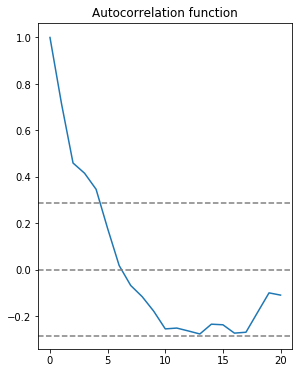

In [145]:
#ACF & PACF
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(df, nlags = 20,fft=False)
lag_pacf = pacf(df,nlags=20,method ='ols')

#plot ACF:
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

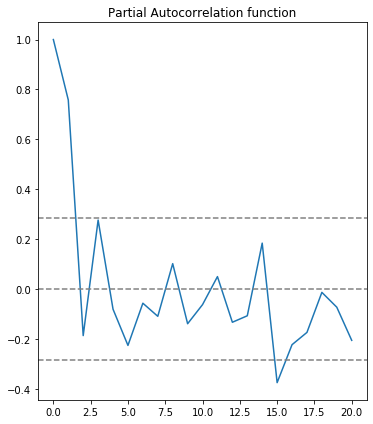

In [146]:
#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 10890167.7519')

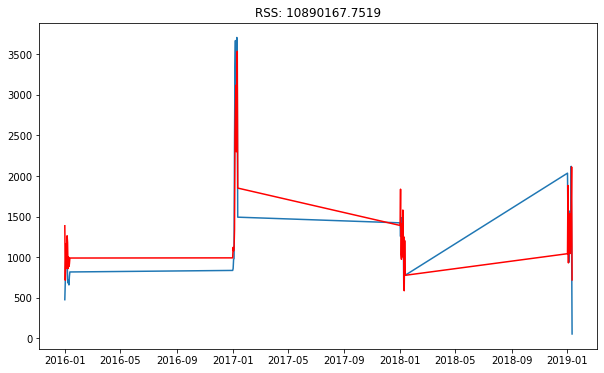

In [147]:
#AR 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df,order=(15,0,0))
results_AR = model.fit(disp = 1)
plt.plot(df)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df['Recetpts'])**2))
#print('plotting AR model')

C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


plotting MA model


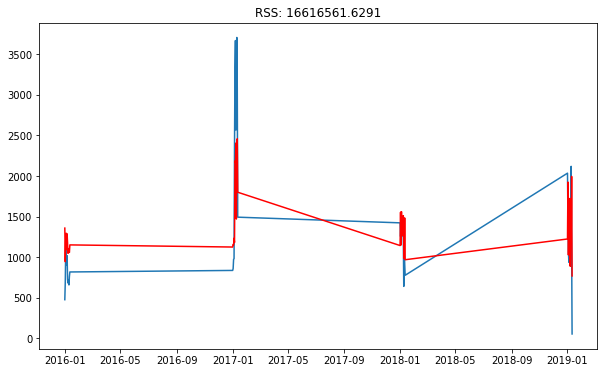

In [160]:
#MA
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df,order=(0,0,1))
results_MA = model.fit()
plt.plot(df)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df['Recetpts'])**2))
print('plotting MA model')

C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 10890167.7519')

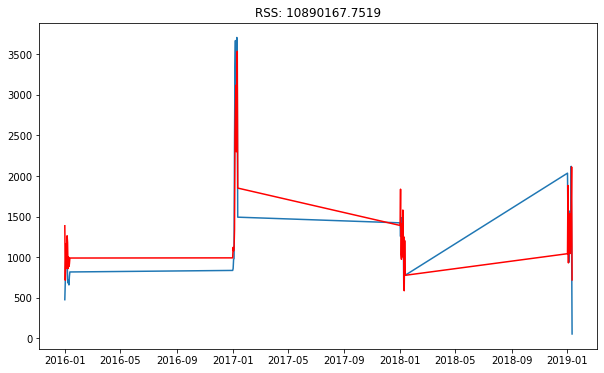

In [164]:
model = ARIMA(df,order=(15,0,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(df)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df['Recetpts'])**2))

In [150]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2016-01-01    1385.971128
2016-01-02     714.356502
2016-01-03     956.075574
2016-01-04    1166.248273
2016-01-05     861.308607
dtype: float64


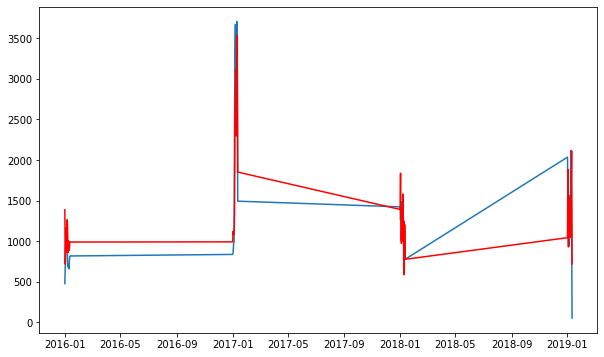

In [151]:
plt.plot(df)
plt.plot(predictions_ARIMA_diff,color='red')

C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


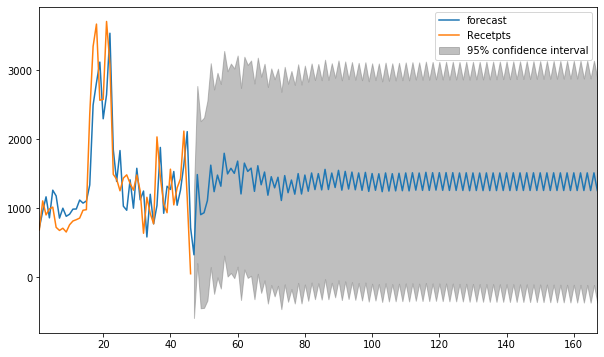

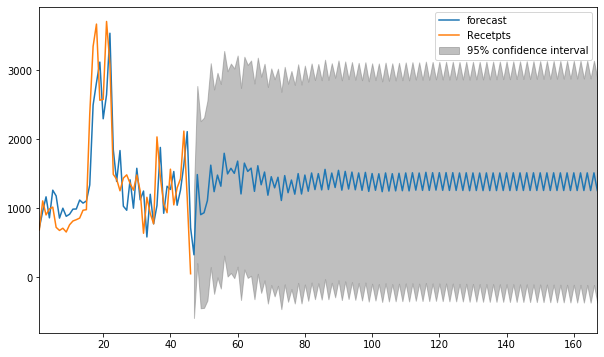

In [165]:
results_ARIMA.plot_predict(1,167)

In [166]:
results_ARIMA.forecast(120)

(array([ 325.92829331, 1489.19580276,  907.54438744,  935.64780274,
        1112.03872806, 1625.45644709, 1241.39480701, 1481.57408482,
        1320.35496169, 1797.77886333, 1498.66510197, 1580.0799635 ,
        1506.90174078, 1684.1759727 , 1208.22198997, 1655.07612866,
        1534.71212975, 1582.36210733, 1245.74497231, 1617.20393635,
        1341.23650103, 1525.50234332, 1189.54064749, 1458.04045607,
        1296.74777577, 1450.1332513 , 1113.38225748, 1474.12326806,
        1226.04423053, 1409.63817551, 1204.88061878, 1502.82758024,
        1207.54896228, 1481.91436914, 1246.93623508, 1511.72883329,
        1271.16164719, 1502.74215297, 1266.75444417, 1564.29345183,
        1272.03854493, 1511.26908104, 1301.19350531, 1550.18751729,
        1262.86146272, 1535.07909496, 1279.37921532, 1524.9305256 ,
        1268.44311699, 1512.44370646, 1260.54321282, 1520.54265973,
        1244.92440975, 1503.88603779, 1261.11802828, 1500.81456782,
        1241.01638668, 1512.63425142, 1249.85942